In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

# IMPORT DATA

In [2]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# EDA

## Info data

In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


## Checking duplicate

In [4]:
crime[crime.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


#### There is no duplicated data

## remove the column that not needed

In [5]:
crimecp=crime.iloc[:,1:]
crimecp

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


## Scaling the data

In [6]:
ss=StandardScaler()
x=ss.fit_transform(crimecp)

# HIERARCHICAL CLUSTERING

## Dendogram

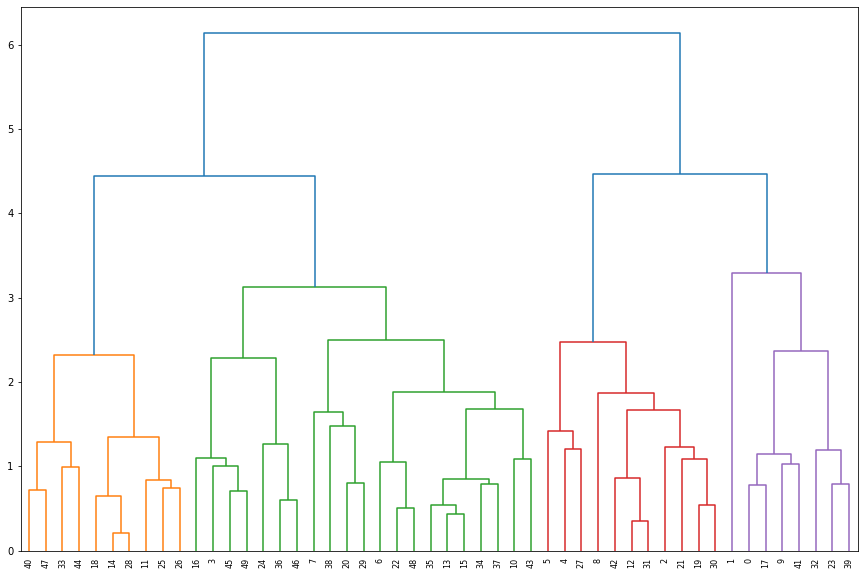

In [7]:
plt.figure(figsize=(15,10))
dendrogram=sch.dendrogram(sch.linkage(x,method='complete'))

### 3 clusters

In [8]:
hc3=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
y_hc3=hc3.fit_predict(x)
crimecp['cluster_id_hc']=pd.Series(y_hc3)
crimecp['cluster_id_hc'].value_counts()

0    31
2    11
1     8
Name: cluster_id_hc, dtype: int64

In [9]:
crimecp.groupby('cluster_id_hc').mean()

,Murder,Assault,UrbanPop,Rape
cluster_id_hc,,,,
0,5.003226,116.483871,63.838710,16.338710
1,14.087500,252.750000,53.500000,24.537500
2,11.054545,264.090909,79.090909,32.618182


### 4 Clusters

In [15]:
hc4=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')
y_hc4=hc4.fit_predict(x)
crimecp['cluster_id_hc']=pd.Series(y_hc4)
crimecp['cluster_id_hc'].value_counts()

1    21
2    11
3    10
0     8
Name: cluster_id_hc, dtype: int64

In [16]:
crimecp.groupby('cluster_id_hc').mean()

,Murder,Assault,UrbanPop,Rape
cluster_id_hc,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


### 5 Clusters

In [17]:
hc5=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
y_hc5=hc5.fit_predict(x)
crimecp['cluster_id_hc']=pd.Series(y_hc5)
crimecp['cluster_id_hc'].value_counts()

0    21
2    11
3    10
1     7
4     1
Name: cluster_id_hc, dtype: int64

In [18]:
crimecp.groupby('cluster_id_hc').mean()

,Murder,Assault,UrbanPop,Rape
cluster_id_hc,,,,
0,5.871429,134.476190,70.761905,18.580952
1,14.671429,251.285714,54.285714,21.685714
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000
4,10.000000,263.000000,48.000000,44.500000


In [20]:
crimecp

,Murder,Assault,UrbanPop,Rape,cluster_id_hc
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,4
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,2
5,7.9,204,78,38.7,2
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,1


#### The 4 Clusters gives best results

# K-Means

## Elbow Graph

[200.0, 104.96163315756871, 80.0888613219962, 57.55425863091104, 50.52026552535068, 43.92746404497574, 40.52183461131976, 34.6873883978491, 32.70648136388185, 28.311639397122555]


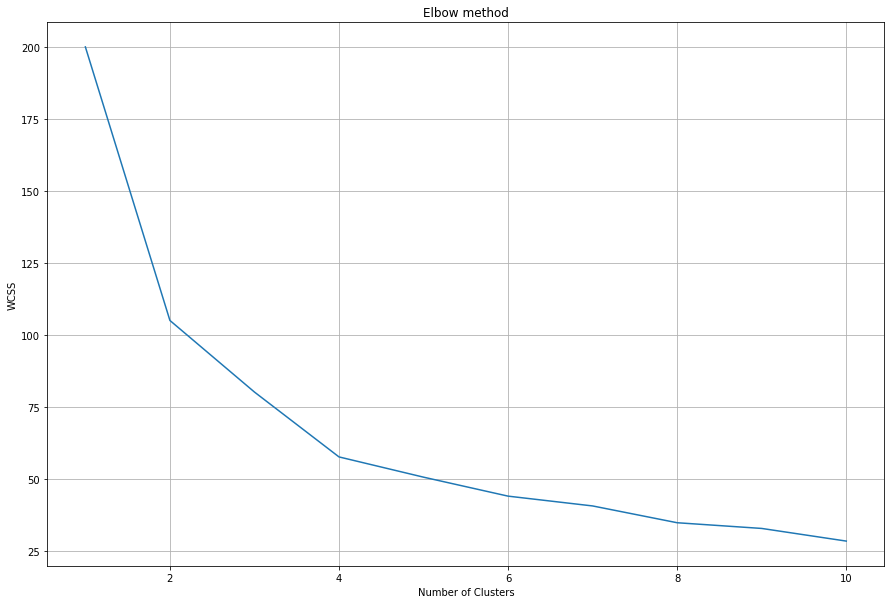

In [24]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
print(wcss)

plt.figure(figsize=(15,10))
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### From the elbow graph the inertia increase reduce after 4 clusters

## 4 Clusters

kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(x)

In [26]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [29]:
crimecp['cluster_id_kmeans']=kmeans.labels_

In [30]:
crimecp.groupby('cluster_id_kmeans').mean()

,Murder,Assault,UrbanPop,Rape,cluster_id_hc,Cluster_id_kmeans
cluster_id_kmeans,,,,,,
0,5.656250,138.875000,73.875000,18.781250,0.000000,0.0
1,10.815385,257.384615,76.000000,33.192308,2.000000,1.0
2,3.600000,78.538462,52.076923,12.176923,2.307692,2.0
3,13.937500,243.625000,53.750000,21.412500,0.875000,3.0


# DBSCAN

In [34]:
dbscan=DBSCAN(eps=1.0,min_samples=8)
dbscan.fit(x)

DBSCAN(eps=1.0, min_samples=8)

In [36]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0, -1,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0],
      dtype=int64)

In [38]:
crimecp['cluster_id_dbscan']=dbscan.labels_

In [41]:
crimecp['cluster_id_dbscan'].value_counts()

-1    32
 0    18
Name: cluster_id_dbscan, dtype: int64

In [39]:
crimecp.groupby('cluster_id_dbscan').mean()

,Murder,Assault,UrbanPop,Rape,cluster_id_hc,Cluster_id_kmeans,cluster_id_kmeans
cluster_id_dbscan,,,,,,,
-1,9.609375,209.000000,68.156250,24.446875,1.218750,1.343750,1.343750
0,4.550000,102.777778,60.888889,15.516667,1.333333,1.111111,1.111111


In [42]:
def dbscan(X,eps,min_samples):
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X)
    y_pred=db.fit_predict(X)
    s=metrics.silhouette_score(x,db.labels_)
    plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='Paired')
    plt.title('DBSCAN')

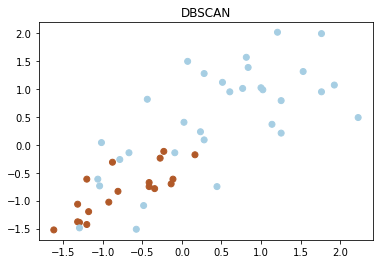

In [43]:
dbscan(x,1,8)

In [47]:
crimecp.groupby('cluster_id_dbscan').mean().iloc[:,:4]

,Murder,Assault,UrbanPop,Rape
cluster_id_dbscan,,,,
-1,9.609375,209.000000,68.156250,24.446875
0,4.550000,102.777778,60.888889,15.516667


#### With DBSCAN best results are achieved with clustering into 2 clusters including outliers

## With hierarchical and K-Means clustering the best results were achieved with 4 clusters

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++